# 1. Import necessary libraries

In [82]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [3]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# 3. Data Understanding / EDA

In [41]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


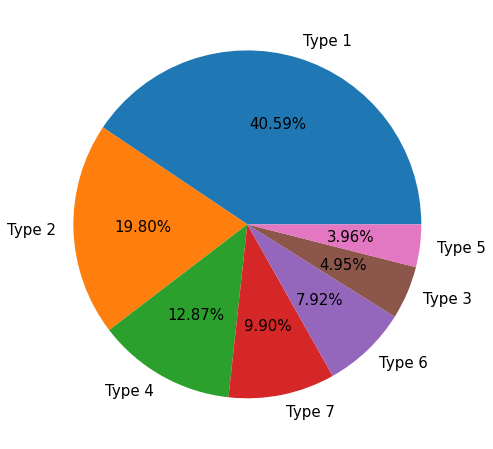

In [40]:
plt.figure(figsize=(8,8))
plt.pie(zoo['type'].value_counts(),labels=['Type 1','Type 2','Type 4','Type 7','Type 6','Type 3','Type 5'],autopct='%1.2f%%',textprops={'fontsize':15})
plt.show()

# 4. Model Building

In [27]:
X=zoo.drop(['animal name','type'],axis=1)
y=zoo[['type']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# 5. Model Training

In [29]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

# 6. Model Testing

In [30]:
y_pred=knn.predict(X_test)

In [54]:
y_pred

array([2, 1, 6, 6, 4, 1, 4, 4, 1, 5, 2, 4, 1, 6, 4, 1, 5, 2, 1, 4, 7, 5,
       2, 7, 1, 1, 2, 2, 1, 1, 1], dtype=int64)

# 7. Model Evaluation

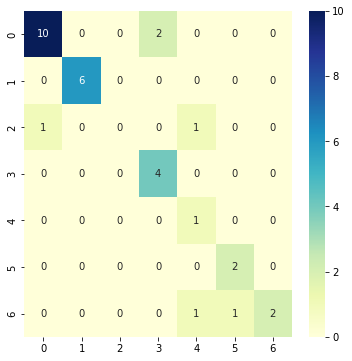

In [57]:
plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(y_test,y_pred),cmap="YlGnBu", annot=True)
plt.show()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         4
           5       0.33      1.00      0.50         1
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         4

    accuracy                           0.81        31
   macro avg       0.65      0.76      0.66        31
weighted avg       0.81      0.81      0.79        31



## Train Accuracy

In [33]:
knn.score(X_train,y_train)

0.9142857142857143

## Test Accuracy

In [35]:
round(knn.score(X_test,y_test),2)

0.81

In [52]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score  = cross_val_score(estimator = knn,X=X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [101]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)

#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print(best_model.best_score_)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1
0.9714285714285715


In [85]:
test_acc=[]
train_acc=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(accuracy_score(y_test,y_pred))

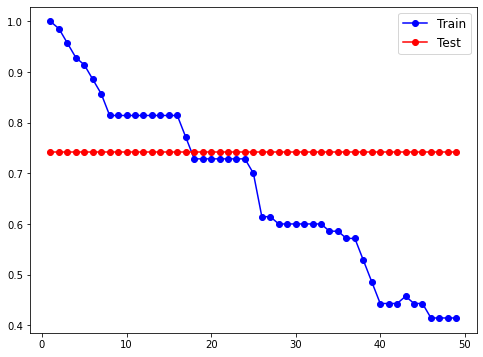

In [100]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1,50),[i for i in train_acc],'bo-',label='Train')
plt.plot(np.arange(1,50),[i for i in test_acc],'ro-',label='Test')
plt.legend(fontsize='large')

In [102]:
knn=KNeighborsClassifier(n_neighbors=3 ,leaf_size=1, p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

In [103]:
y_pred=knn.predict(X_test)

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4

    accuracy                           0.87        31
   macro avg       0.73      0.83      0.76        31
weighted avg       0.84      0.87      0.85        31



In [105]:
knn.score(X_train,y_train)

0.9714285714285714

In [106]:
round(knn.score(X_test,y_test),2)

0.87

In [107]:
accuracy_score(y_test,y_pred)

0.8709677419354839